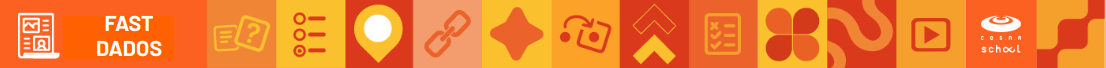

# Trilha #3 - Aula 04 - ETL e Ingestão de Dados

**Prof. Eronides da Silva Neto**

Contato: *efsn@cesar.school*



## ETL com Python

O processo de ETL (Extração, Transformação e Carga) é uma etapa fundamental no processo de análise de dados. O ETL envolve a obtenção de dados de diversas fontes, a aplicação de transformações para limpá-los e estruturá-los adequadamente e, finalmente, o carregamento dos dados processados em um destino apropriado, sendo este um banco de dados, arquivo ou uma propria aplicação.




**2.Transformação (Transform):**

Após a extração, os dados brutos podem estar em formatos diversos e arquivos, podendo assim conter ruído. Geralmente a "sujera" nos dados sao definidas como valores ausentes ou informações inconsistentes. Consequentemente, nesta etapa são aplicadas diversas operações de limpeza, tratamento e manipulação para preparar os dados para análise. Podendo envolver:

- Remoção de dados duplicados ou irrelevantes.
- Preenchimento de valores ausentes para tratamento de forma apropriada.
- Convesão de tipos de dados para garantir consistência.
- Aplição de filtros, agregações ou outras operações.

Bibliotecas como Pandas, NumPy e PySpark são frequentemente usadas para realizar essas transformações.

**3. Carga (Load):**

Uma vez que os dados foram extraídos e transformados, eles estão prontos para serem carregados em um destino final, como um banco de dados ou um arquivo de dados processados.
A escolha do destino depende das necessidades do projeto. Você pode carregar os dados em bancos de dados relacionais (por exemplo, MySQL, PostgreSQL) ou não relacionais (por exemplo, MongoDB) ou em formatos como CSV, Parquet, etc.
Bibliotecas como SQLAlchemy, psycopg2 (para PostgreSQL), pymongo (para MongoDB) ou Pandas podem ser usadas para realizar a carga dos dados.

In [9]:
!pip install tqdm


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [10]:
# Realizar a operacao de import das bibliotecas necessarias! =)
import pandas as pd
import numpy as np
import time
from tqdm import tqdm

### **1. Extração (Extract)**

Os dados são coletados de diferentes fontes, como:
- Bancos de dados.
- Arquivos CSV.
- APIs da web.

Bibliotecas comuns em Python para a extração incluem Pandas (para leitura de arquivos), Requests (para fazer requisições web) e diversas bibliotecas de bancos de dados (incluindo o driver do banco associado).


In [11]:
def load_data() -> str:
  # O objetivo é extrair as classificações dos campeonatos BR de 2006 até 2022
  lista_anos = []
  for ano in range(2006, 2023):
    lista_anos.append(ano)
  #
  try:
    for campeonato in tqdm(lista_anos):
      print(f" --- Coletando dados do Campeonato Brasileiro de {campeonato} ---")
      base_url = f'https://pt.wikipedia.org/wiki/Campeonato_Brasileiro_de_Futebol_de_{campeonato}_-_S%C3%A9rie_A'
      br_list = pd.read_html(base_url)[0:10]
      # Em geral o sexto elemento da lista br_list, corresponde a classificacao Final do campeonato. porem precisamos confirmar
      for pos in range(10):
        if((br_list[pos].shape[0] == 20) & (br_list[pos].shape[1] > 10) & (br_list[pos].shape[1] < 14)):
          br_df = br_list[pos]
          # Salvar a classificacao final em arquivo .csv
          print(f' Salvando o arquivo do campeonato de {campeonato} no arquivo br_{campeonato}.csv')
          br_df.to_csv(f'br_{campeonato}.csv', index=False)
    return "Arquivos carregados com sucesso"
  except:
    return "Erro ao carregar os arquivos..."

In [12]:
# digite aqui para carregar os dados, a chamada da funcao load_data

In [13]:
def get_tabela(ano:int) -> pd.DataFrame:
  ff = f'/content/br_{ano}.csv'
  return pd.read_csv(ff)

### **2.Transformação (Transform)**

Após a extração, os dados brutos podem estar em formatos diversos e arquivos, podendo assim conter ruído. Geralmente a "sujeira" nos dados sao definidas como valores ausentes ou informações inconsistentes. Consequentemente, nesta etapa são aplicadas diversas operações de limpeza, tratamento e manipulação para preparar os dados para análise. Podendo envolver:

- Remoção de dados duplicados ou irrelevantes.
- Preenchimento de valores ausentes para tratamento de forma apropriada.
- Convesão de tipos de dados para garantir consistência.
- Aplição de filtros, agregações ou outras operações.

Bibliotecas como Pandas, NumPy e PySpark são frequentemente usadas para realizar essas transformações.

Em nossa atividade, iremos focar exclusivamente no **Pandas**.

#### Limpeza e Ajuste dos dados

In [14]:
lista_anos = []
for ano in range(2006, 2023):
  lista_anos.append(ano)

In [15]:
# descobrir as colunas de todos os anos
# digite aqui uma forma de fazer isso

In [16]:
colunas_tabelas

NameError: name 'colunas_tabelas' is not defined

Observações:

1. Noto que a tabela possui uma coluna **M** que não retorna muita informação relevante, dessa forma irei excluir. Essa informação está presente entre o ano de 2010 e 2018.

2. Alguns anos, temos `Equipeved`

In [ ]:
columns_to_changed = # digit

In [ ]:
sdf_columns = ['Ano', 'Pos.', 'Equipes', 'P', 'J', 'V', 'E', 'D', 'GP', 'GC', 'SG', '%']
dfg = pd.DataFrame(columns=sdf_columns)

In [ ]:
for campeonato in lista_anos:
  explorer_file = f'/content/br_{campeonato}.csv'
  idf = pd.read_csv(explorer_file)
  idf['Ano'] = int(campeonato)
  print(f'Carregado o df {campeonato}!')
  column = idf.columns

  # checa cada coluna do DataFram
  for col_name in column:
    # se temos alguma coluna com modificação pendente, realizar esta modificação
    if(col_name in columns_to_changed):
      if(col_name == 'Pos'):
        idf.rename(columns={'Pos': 'Pos.'}, inplace=True)
      if(col_name == 'M'):
        idf.drop('M', axis=1, inplace=True)
      if(col_name == 'Pts'):
        idf.rename(columns={'Pts': 'P'}, inplace=True)
      if(col_name == 'Equipevde'):
        idf.rename(columns={'Equipevde': 'Equipes'}, inplace=True)
      if(col_name == 'Classificação ou descenso'):
        idf.rename(columns={'Classificação ou descenso': 'Classificação ou rebaixamento'}, inplace=True)

  # realiza o processo de Append de DataFrame após o processo de limpeza!
  frames = [dfg, idf]
  dfg = pd.concat(frames, ignore_index=True)


In [ ]:
dfg.shape

(340, 15)

In [ ]:
dfg.info()

In [ ]:
for index, row in dfg.iterrows():
  if(type(dfg['P'][index]) == str):
    dfg['P'][index] = int(dfg['P'][index][:2])

In [ ]:
# Ajuste do aproveitamento
TOTAL = 114
# aproveitamento = PONTOS/TOTAL, assim podemos substituir quem nao tem por essa conta
dfg['%'] = dfg['%'].fillna(100*dfg['P']/114)
dfg['%'] = dfg['%'].apply(lambda x: round(x, 2))

In [ ]:
dfg.info()

In [ ]:
dfg['%'].unique()

In [ ]:
dfg[dfg.Equipes == 'CSA']

,Ano,Pos.,Equipes,P,J,V,E,D,GP,GC,SG,%,Classificação ou rebaixamento,Equipe,Unnamed: 10


#### Substituir nomes dos times

In [ ]:
# digite aqui -  verificar as equipes unicas deste DataFrame. Nao queremos ter equipes repetidas!

Note que apos o uso do metodo info, teremos que ajustar ainda as colunas de aproveitamento (`%`) e `Classificação ou rebaixamento`.

In [ ]:
# flamengo
dfg['Equipes'] = dfg['Equipes'].str.replace('Flamengo (C)', 'Flamengo', regex=False)
# palmeiras
dfg['Equipes'] = dfg['Equipes'].str.replace('Palmeiras (C)', 'Palmeiras', regex=False)
dfg['Equipes'] = dfg['Equipes'].str.replace('Palmeiras1', 'Palmeiras', regex=False)
# cruzeiro
dfg['Equipes'] = dfg['Equipes'].str.replace('Cruzeiro (R)', 'Cruzeiro', regex=False)
# sport
dfg['Equipes'] = dfg['Equipes'].str.replace('Sport[nota 4]', 'Sport', regex=False)
# avai
dfg['Equipes'] = dfg['Equipes'].str.replace('Avaí (R)', 'Avaí', regex=False)
# CSA
dfg['Equipes'] = dfg['Equipes'].str.replace('CSA (R)', 'CSA', regex=False)
# chape
dfg['Equipes'] = dfg['Equipes'].str.replace('Chapecoense (R)', 'Chapecoense', regex=False)

In [ ]:
# digite aqui -  verificar as equipes unicas deste DataFrame. Nao queremos ter equipes repetidas! verificar apos mudancas

#### Criar novas colunas

- Coluna libertadores (pos 1, pos 2, pos 3, pos 4)
- Coluna Pre-libertadores (a partir de 2017, pos 5 e 6)
- Coluna Rebaixamento (pos 20, 19, 18, 17)

In [ ]:
dfg[dfg.Equipes == 'Bahia']

Criar um novo DataFrame que possa resumir os resultados dos times

In [ ]:
new_columns = ['Equipes',	'P',	'J',	'V',	'E',	'D',	'GP',	'GC',	'SG', 'Titulos', 'Libertadores', 'Rebaixamentos']

In [ ]:
stats = {}

In [ ]:
keys_list = new_columns
initial_values = [None] * len(keys_list)  # You can replace None with desired initial values
stats = {key: value for key, value in zip(keys_list, initial_values)}

In [ ]:
stats

In [ ]:
dfs = pd.DataFrame(columns=new_columns)

In [ ]:
TIMES = dfg.Equipes.unique()

In [ ]:
cont = 0
N = len(TIMES)

In [ ]:
# converter os tipos -- 'P',	'J',	'V',	'E',	'D',	'GP',	'GC',	'SG'
dfg['Pos.'] = pd.to_numeric(dfg['Pos.'], errors='coerce').astype(int)
dfg['P'] = pd.to_numeric(dfg['P'], errors='coerce').astype(int)
dfg['J'] = pd.to_numeric(dfg['J'], errors='coerce').astype(int)
dfg['V'] = pd.to_numeric(dfg['V'], errors='coerce').astype(int)
dfg['E'] = pd.to_numeric(dfg['E'], errors='coerce').astype(int)
dfg['D'] = pd.to_numeric(dfg['D'], errors='coerce').astype(int)
dfg['GP'] = pd.to_numeric(dfg['GP'], errors='coerce').astype(int)
dfg['GC'] = pd.to_numeric(dfg['GC'], errors='coerce').astype(int)
dfg['SG'] = pd.to_numeric(dfg['SG'], errors='coerce').astype(float)

In [ ]:
cont = 0

for nome in TIMES:
  # calcular estatisticas de campeao - libertadores - rebaixamentos
  frws = dfg[dfg['Equipes'] == nome]['Pos.']
  [ct, cl, cr] = [0, 0,0 ]
  for elements in frws:
    if(elements == 1):
      ct = ct + 1
      cl = cl + 1
    if((elements > 1) & (elements < 5)):
      cl = cl + 1
    if(elements>=17):
      cr = cr + 1
  # calcular estatisticas - 'P',	'J',	'V',	'E',	'D',	'GP',	'GC',	'SG'
  summary_row = [dfg[dfg['Equipes'] == nome]['P'].sum(),
                 dfg[dfg['Equipes'] == nome]['J'].sum(),
                 dfg[dfg['Equipes'] == nome]['V'].sum(),
                 dfg[dfg['Equipes'] == nome]['E'].sum(),
                 dfg[dfg['Equipes'] == nome]['D'].sum(),
                 dfg[dfg['Equipes'] == nome]['GP'].sum(),
                 dfg[dfg['Equipes'] == nome]['GC'].sum(),
                 dfg[dfg['Equipes'] == nome]['SG'].sum(),
                 ct,
                 cl,
                 cr]
  # titulos - libertadores - rebaixamentos
  dfs.loc[cont] = [nome] + summary_row
  cont = cont + 1

In [ ]:
filtered_rows = dfg[dfg['Equipes'] == 'Sport']['Pos.']

In [ ]:
type(filtered_rows)

pandas.core.series.Series

In [ ]:
for x in filtered_rows:
  print(x)

In [ ]:
dfs

In [ ]:
def transform(data:dict) -> pd.DataFrame:
  # 1 - Fazer um processo de limpeza nos dados
  # 2 - Realizar calculos / convesão de tipos
  # 3 - salvar em df
  return dfo

### **3. Carga (Load)**

Uma vez que os dados foram extraídos e transformados, eles estão prontos para serem carregados em um destino final, como um banco de dados ou um arquivo de dados processados.
A escolha do destino depende das necessidades do projeto. Você pode carregar os dados em bancos de dados relacionais (por exemplo, MySQL, PostgreSQL) ou não relacionais (por exemplo, MongoDB) ou em formatos como CSV, Parquet, etc.
Bibliotecas como SQLAlchemy, psycopg2 (para PostgreSQL), pymongo (para MongoDB) ou Pandas podem ser usadas para realizar a carga dos dados.

In [ ]:
dfs.head(5)

### Salvando em arquivo .csv

In [ ]:
# digite aqui o codigo para salvar o dataframe dfs em .csv

### Salvando em arquivo parquet

In [ ]:
# digite aqui o codigo para salvar o dataframe dfs em arquio .parquet

## Ingestão de Dados

O exemplo de Ingestão de Dados que iremos ver neste notebook é referente a obtenção de dados estatísticos da rede Lightning do Bitcoin.  Esta rede é uma espécie de segunda camada da Blockchian, que permite pagamentos instântaneos, assim como o sistema PIX utilizado no Brasil.

O site [1ML](https://1ml.com/) fornece uma opção para acompanhar os dados em tempo real.

Desta forma, neste exemplo iremos ingerir dados no formato JSON em tempo real, a partir de uma conexão.

In [ ]:
# Importando algumas bibiliotecas que iremos precisar!
import requests
from pandas.io.json import json_normalize
import pandas as pd
import csv
import matplotlib as pyplot
import datetime
import time

In [ ]:
# URL do arquivo JSON que o site 1ML disponibiliza para capturar o dado em tempo real
JSON_URL = 'https://1ml.com/statistics?json=true'

Agora vamos definir uma função para pegar o dado de estatística do site 1ML em tempo real.

In [ ]:
def get_current_data() -> pd.DataFrame:
  request_data = requests.get(JSON_URL)
  json_data = request_data.json()
  json_data['timestamp'] = datetime.datetime.now()
  # create columns name with timestap as first!
  colunas_dict = list(json_data.keys())
  # Cria a estrutura de dado DataFrame
  df = pd.DataFrame(columns=colunas_dict)
  # Adiciona novos dados ao dataframe, no caso, a estatística em tempo real
  df = pd.DataFrame([json_data])
  # Adiciona o timestamp
  df.set_index('timestamp', inplace=True)
  return df

In [ ]:
new_input = get_current_data()

In [ ]:
new_input

Certo, muito bom! Agora temos uma ferramenta para pegar a estatística em tempo real, mas como eu poderia organizar de alguma forma?

### Coletando os Dados por um intervaldo pré-definido

In [ ]:
collected_data = pd.DataFrame(columns=new_input.columns)

In [ ]:
def collect_1ml_data(data, time_interval=30, frequency=1) -> pd.DataFrame:
  start_time = time.time()
  output_df = pd.DataFrame(columns=data.columns)
  while ((time.time() - start_time) < time_interval):
      try:
          current_data = get_current_data()
          output_df = pd.concat([output_df, get_current_data()])
          # adicionar um intervalo de tempo, o padrão será 1 segundo.
          time.sleep(frequency)

      except Exception as e:
          print(f"O seguinte erro aconteceu: {str(e)}")

  print(f"Coletamos {len(output_df)} registros de dados em {time_interval} segundos.")

  return output_df

In [ ]:
# digite aqui para criar um dataframe (res_df) com intervalo de tempo de 15 e frequencia de 5

### Ingestão assíncrona

A ingestão de dados **assíncrona** em Python pode ser feita usando bibliotecas como `asyncio` e `aiohttp` para realizar solicitações HTTP assíncronas usando a biblioteca requests.

A seguir, está um exemplo simples de como realizar a ingestão de dados assíncrona usando essas bibliotecas.

**OBSERVAÇÃO: esse código não irá rodar no Colab, apenas no seu computador localmente (com Anaconda ou Python instalando nativamente).**


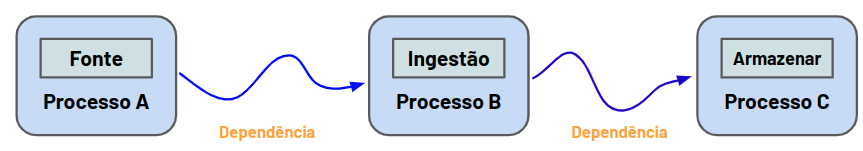

**Note que neste exemplo:**

1. Importamos as bibliotecas asyncio e aiohttp para criar solicitações HTTP assíncronas.

2. Definimos a função fetch_data para buscar dados de uma URL usando o aiohttp. Esta função é uma função assíncrona e retorna os dados em formato JSON se a solicitação for bem-sucedida.

3. Definimos a função assíncrona main, onde definimos as URLs que desejamos buscar, criamos tarefas assíncronas para buscar dados de cada URL e, em seguida, usamos asyncio.gather para aguardar até que todas as tarefas sejam concluídas.

4. Após a conclusão das tarefas, data_list conterá os dados buscados de todas as URLs.

6. Finalmente, executamos o loop de eventos asyncio para executar a função main.